# Recommender System implementation (on MovieLens 100k dataset)

## Data Loading

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# The columns of this data frame do not have names
# u.data is a tsv file (tab separated values)
df = pd.read_csv('u.data', sep="\t", names=['user_id','item_id','rating','timestamp'])

print(df.shape)
df.head()

(100000, 4)


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
# get the names of movies
movies = pd.read_csv('u.item', sep="\|", header=None, engine='python', encoding='latin1')

In [ ]:
print(movies.shape)
movies.head()

(1682, 24)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Data Preparation

In [ ]:
# we just need to extract two columns from this dataset to get the movie names corresponding to each item_id
movies = movies[[0,1]]
movies.columns = ['item_id','title']
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
# merging both dataframes
df = pd.merge(df, movies, on="item_id")

In [ ]:
# merged dataframe
print(df.head())

   user_id  item_id  rating  timestamp                       title
0      196      242       3  881250949                Kolya (1996)
1      186      302       3  891717742    L.A. Confidential (1997)
2       22      377       1  878887116         Heavyweights (1994)
3      244       51       2  880606923  Legends of the Fall (1994)
4      166      346       1  886397596         Jackie Brown (1997)


In [ ]:
# find the average rating of each movie
df.groupby("title").mean()['rating'].sort_values(ascending=False)

,rating
title,
Aiqing wansui (1994),5.0
Entertaining Angels: The Dorothy Day Story (1996),5.0
Santa with Muscles (1996),5.0
Prefontaine (1997),5.0
They Made Me a Criminal (1939),5.0
...,...
Pharaoh's Army (1995),1.0
August (1996),1.0
Babyfever (1994),1.0


In [ ]:
# find out the number of ratings a particular movie has received
df.groupby("title").count()["rating"].sort_values(ascending=False)

,rating
title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485
...,...
"War at Home, The (1996)",1
Mirage (1995),1
"Modern Affair, A (1995)",1


In [ ]:
# create a separate dataframe with both attributes (average rating and number of ratings) for every movie
ratings = pd.DataFrame(df.groupby("title").mean()['rating'])
ratings['number of ratings'] = pd.DataFrame(df.groupby("title").count()["rating"])
print(ratings.head(10))

                                               rating  number of ratings
title                                                                   
'Til There Was You (1997)                    2.333333                  9
1-900 (1994)                                 2.600000                  5
101 Dalmatians (1996)                        2.908257                109
12 Angry Men (1957)                          4.344000                125
187 (1997)                                   3.024390                 41
2 Days in the Valley (1996)                  3.225806                 93
20,000 Leagues Under the Sea (1954)          3.500000                 72
2001: A Space Odyssey (1968)                 3.969112                259
3 Ninjas: High Noon At Mega Mountain (1998)  1.000000                  5
39 Steps, The (1935)                         4.050847                 59


In [ ]:
ratings.sort_values(by='rating', ascending=False)

,rating,number of ratings
title,,
Aiqing wansui (1994),5.0,1
Entertaining Angels: The Dorothy Day Story (1996),5.0,1
Santa with Muscles (1996),5.0,2
Prefontaine (1997),5.0,3
They Made Me a Criminal (1939),5.0,1
...,...,...
Pharaoh's Army (1995),1.0,1
August (1996),1.0,1
Babyfever (1994),1.0,2


## Exploratory Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

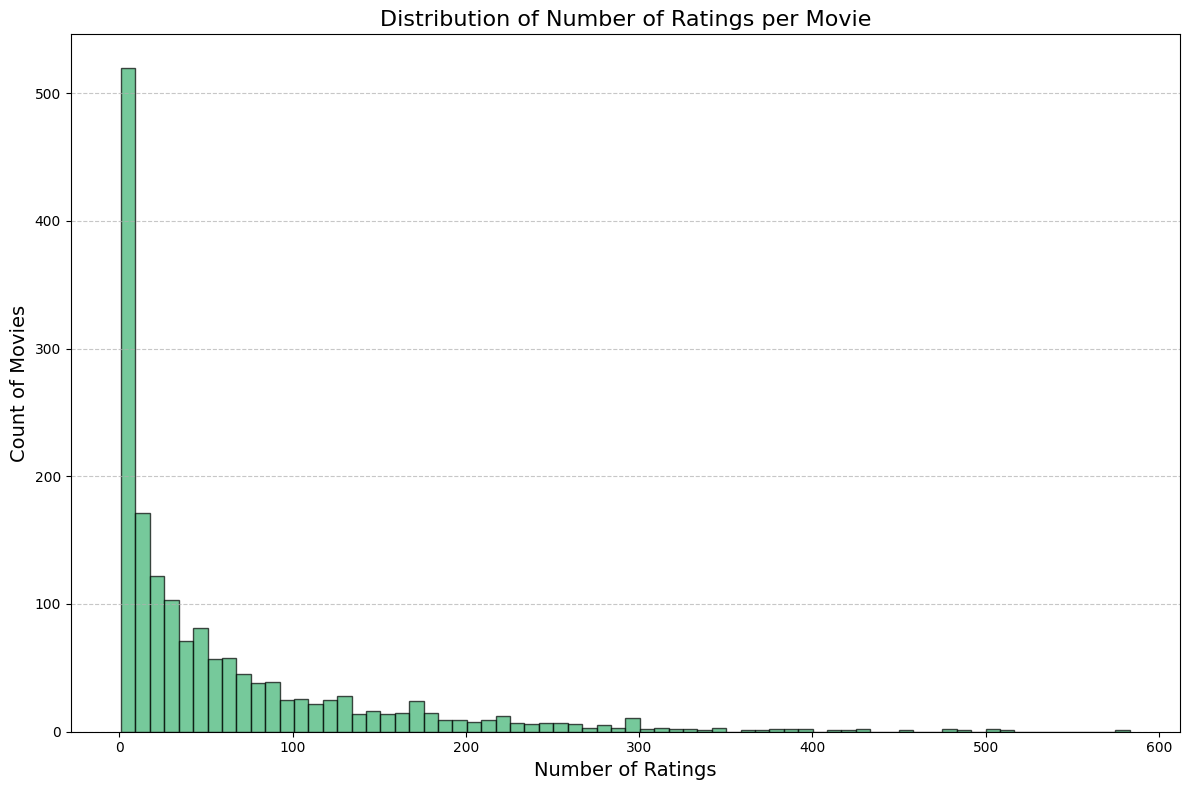

In [ ]:
# Plot histogram of number of ratings
plt.figure(figsize=(12, 8))
plt.hist(ratings['number of ratings'], bins=70, color='mediumseagreen', edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Distribution of Number of Ratings per Movie', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Count of Movies', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout to avoid clipping
plt.tight_layout()
plt.show()

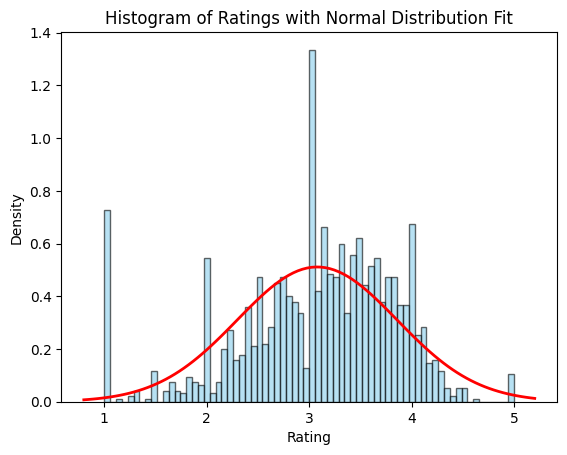

In [ ]:
import scipy.stats as stats

# Plot histogram of ratings
plt.hist(ratings['rating'], bins=70, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Fit a normal distribution to the data
mu, std = np.mean(ratings['rating']), np.std(ratings['rating'])

# Generate x values for the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

# Plot the normal distribution curve
plt.plot(x, p, 'r', linewidth=2)

# Add labels
plt.title('Histogram of Ratings with Normal Distribution Fit')
plt.xlabel('Rating')
plt.ylabel('Density')

plt.show()

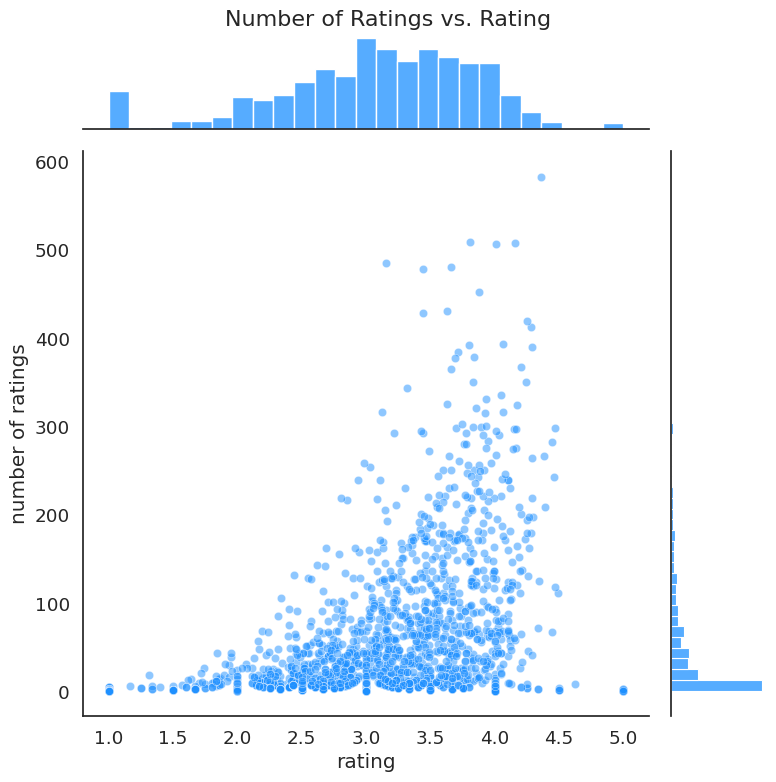

In [ ]:
# Set Seaborn style
sns.set(style="white", font_scale=1.2)

# The jointplot
plot = sns.jointplot(
    x='rating',
    y='number of ratings',
    data=ratings,
    kind='scatter',
    height=8,
    space=0.2,
    color='dodgerblue',
    edgecolor='white',
    alpha=0.5
)

# Accurate title
plot.fig.suptitle('Number of Ratings vs. Rating', fontsize=16)

# Adjust layout to prevent overlap
plot.fig.tight_layout()
plot.fig.subplots_adjust(top=0.95)

## Item-Based Collaborative Filtering using Pearson Correlation

In [ ]:
# Create a matrix where rows are users and columns are movies
movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
print(movie_matrix.shape)
movie_matrix.head(10)

(943, 1664)


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movies = list(movie_matrix.columns)
for movie in movies:
  if "dead poets society" in movie.lower():
    print(movie)

Dead Poets Society (1989)


In [ ]:
# Set the target movie (which we want to find similar movies)
target_movie = "Dead Poets Society (1989)"

# Extract the user ratings for the target movie
target_movie_ratings = movie_matrix[target_movie]
target_movie_ratings.head(10)

,Dead Poets Society (1989)
user_id,
1,5.0
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,5.0
8,NaN
9,NaN


In [ ]:
# Correlation between Dead Poets Society's ratings and all other movies
similar_movies = movie_matrix.corrwith(target_movie_ratings)

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
# Convert the result into a DataFrame and clean it (drop NaNs)
corr_movies = pd.DataFrame(similar_movies, columns=['Correlation'])
corr_movies.dropna(inplace=True)
corr_movies.head()

,Correlation
title,
'Til There Was You (1997),0.636364
101 Dalmatians (1996),0.191193
12 Angry Men (1957),0.284413
187 (1997),0.496967
2 Days in the Valley (1996),0.163506


In [ ]:
# Add the number of ratings column to the correlation DataFrame
corr_movies = corr_movies.join(ratings['number of ratings'])
corr_movies.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.636364,9
101 Dalmatians (1996),0.191193,109
12 Angry Men (1957),0.284413,125
187 (1997),0.496967,41
2 Days in the Valley (1996),0.163506,93


### Recommendations

In [ ]:
# Recommend top 10 similar movies with at least 50 ratings
recommendations = corr_movies[corr_movies['number of ratings'] > 50].sort_values('Correlation', ascending=False)
recommendations.head(11)[1:] # Exclude Dead Poets Society itself

,Correlation,number of ratings
title,,
Desperate Measures (1998),0.635934,72
Nine Months (1995),0.623219,58
Excess Baggage (1997),0.599329,52
"Secret of Roan Inish, The (1994)",0.563715,71
Cyrano de Bergerac (1990),0.536204,66
Robin Hood: Prince of Thieves (1991),0.532098,75
"Parent Trap, The (1961)",0.514796,73
Sleeper (1973),0.485157,82
Sleepless in Seattle (1993),0.466562,213


## User-Based Collaborative Filtering using Cosine Similarity

In [ ]:
# Create a matrix where rows are users and columns are movies
user_movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')

# Fill missing values with 0
user_movie_matrix = user_movie_matrix.fillna(0)
user_movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the ratings to normalize user behavior
scaler = StandardScaler()
user_movie_scaled = scaler.fit_transform(user_movie_matrix)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_movie_scaled)

# Convert to DataFrame for readability
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)
print(user_similarity.shape)
user_similarity_df.head()

(943, 943)


user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.075275,-0.138887,-0.108082,0.082707,0.069199,0.066838,-0.043079,-0.092053,0.059066,...,0.034079,-0.144247,0.045591,-0.071965,-0.059060,-0.067357,-0.039881,-0.177599,-0.076801,0.063373
2,-0.075275,1.000000,0.051143,0.056966,-0.067444,-0.002225,-0.112452,-0.010987,0.078451,-0.068205,...,-0.063083,0.125691,0.041134,0.219722,0.040450,0.056615,0.007008,0.096407,0.016657,-0.079257
3,-0.138887,0.051143,1.000000,0.226719,-0.072376,-0.119481,-0.125056,0.099374,0.105575,-0.087815,...,-0.102441,0.047019,-0.008799,0.096355,-0.007619,0.008666,0.047646,0.142980,0.020394,-0.107935
4,-0.108082,0.056966,0.226719,1.000000,-0.052526,-0.099536,-0.108348,0.093321,0.109378,-0.085291,...,-0.072598,0.059425,-0.012824,0.136058,0.004847,0.016377,0.046459,0.169878,0.084327,-0.068208
5,0.082707,-0.067444,-0.072376,-0.052526,1.000000,-0.036442,0.073859,-0.006159,-0.052662,-0.022450,...,0.043954,-0.077888,-0.038148,-0.067636,-0.043930,-0.006757,-0.023257,-0.049871,-0.044088,0.053611


In [ ]:
# Sort the similarities to find top 5 similar users (to user 100)
similar_users = user_similarity_df[100].sort_values(ascending=False)[1:6]  # Exclude user 100 themselves
print("Top similar users to user 100:\n", similar_users)

Top similar users to user 100:
 user_id
915    0.221978
507    0.212019
423    0.207081
646    0.203082
353    0.198128
Name: 100, dtype: float64


In [ ]:
# Select top 5 similar users to the user (100)
top_users = similar_users.index

# Extract their ratings
similar_users_ratings = user_movie_matrix.loc[top_users]
similar_users_ratings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Movies user 100 has already rated
user100_ratings = user_movie_matrix.loc[100]
rated_movies = user100_ratings[user100_ratings > 0].index

In [ ]:
# Remove movies already rated by user 10
unrated_movies = user_movie_matrix.columns.difference(rated_movies)

# Filter similar users' ratings to only include those movies (unrated by user 100)
filtered_ratings = similar_users_ratings[unrated_movies]
filtered_ratings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get similarity scores for the top users
top_sim_scores = similar_users.loc[top_users].values

# Compute weighted ratings
weighted_ratings = filtered_ratings.T.dot(top_sim_scores)

# Normalize by sum of similarity scores
sum_weights = np.sum(top_sim_scores)
recommendation_scores = weighted_ratings / sum_weights

# Convert to DataFrame for clarity
recommendations = pd.DataFrame(recommendation_scores, index=unrated_movies, columns=['predicted_rating'])
recommendations = recommendations.sort_values(by='predicted_rating', ascending=False)

### Recommendation

In [ ]:
# Top 10 movie recommendations for user 100
recommendations.head(10)

,predicted_rating
title,
"Devil's Advocate, The (1997)",2.836566
"Devil's Own, The (1997)",2.572161
"Saint, The (1997)",2.197651
Fly Away Home (1996),2.018160
Deconstructing Harry (1997),1.868972
Red Corner (1997),1.811803
U Turn (1997),1.656000
I Know What You Did Last Summer (1997),1.601612
Kiss the Girls (1997),1.534974
